In [21]:
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
from general.dat_helper import group_by_mean
from general.plot_settings import paper_settings, generate_plt_styles, colors
plt.rcParams.update(paper_settings)
figsize = paper_settings['figure.figsize']
colors = colors[0:]
# colors = ['blue', 'red']
styles = generate_plt_styles(colors=colors)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 7

In [157]:
data_folder = os.path.join("..", "data", "blackman_vs_square")
files = glob(os.path.join(data_folder, '*'))

res_freqs = [47.2227, 45.8835, 48.3759, 47.2227]
labels = ['202.14G, 9/7 to 5, square',
		  '209G, 9 to 7, square',
		  '209G, 9/7 to 5, square',
		  '202.14G, 9/7 to 5, Blackman']
markers = ['s', 's', 's', 'o']

names = ['freq', 'fraction95']

dfs = []
for file in files:
    dfs.append(pd.read_table(file, delimiter=',')) # making dataframe of chosen data

print(dfs[0].columns)

bg_f_95_df = dfs[3][dfs[3].freq <= 46.7227]['fraction95']
bg_f_95 = np.mean(bg_f_95_df)
e_bg_f_95 = np.std(bg_f_95_df)/np.sqrt(len(bg_f_95_df))
print(f"Background fraction95: {bg_f_95} ± {e_bg_f_95}")

for i, df in enumerate(dfs):
	df['detuning'] = df[names[0]] - res_freqs[i]
	df['transfer_corrected'] = df[names[1]] - bg_f_95

Index(['cyc', 'freq', 'cyc.1', 'ROIsum', 'fBg', 'fA1', 'fWidth1', 'fCtr1',
       'fA2', 'fWidth2', 'fCtr2', 'box1', 'box2', 'box3', 'box4', 'box5',
       'box6', 'box7', 'box8', 'box9', 'Nfit', 'BZ-2', 'BZ-1', 'BZ0', 'BZ1',
       'BZ2', 'Excited', 'c5', 'c7', 'c9', 'fraction95', 'fraction75',
       'fraction97', 'sum95', 'two2D_bg', 'two2D_a1', 'two2D_sh1', 'two2D_sv1',
       'two2D_ch1', 'two2D_cv1', 'two2D_a2', 'two2D_sh2', 'two2D_sv2',
       'two2D_ch2', 'two2D_cv2', 'two2D_chd', 'two2D_cvd'],
      dtype='object')
Background fraction95: 0.010057297272727273 ± 0.0008867903500111384


Fitted amplitude for square Fourier: 0.004151066672089266 ± 0.0006924331181594413


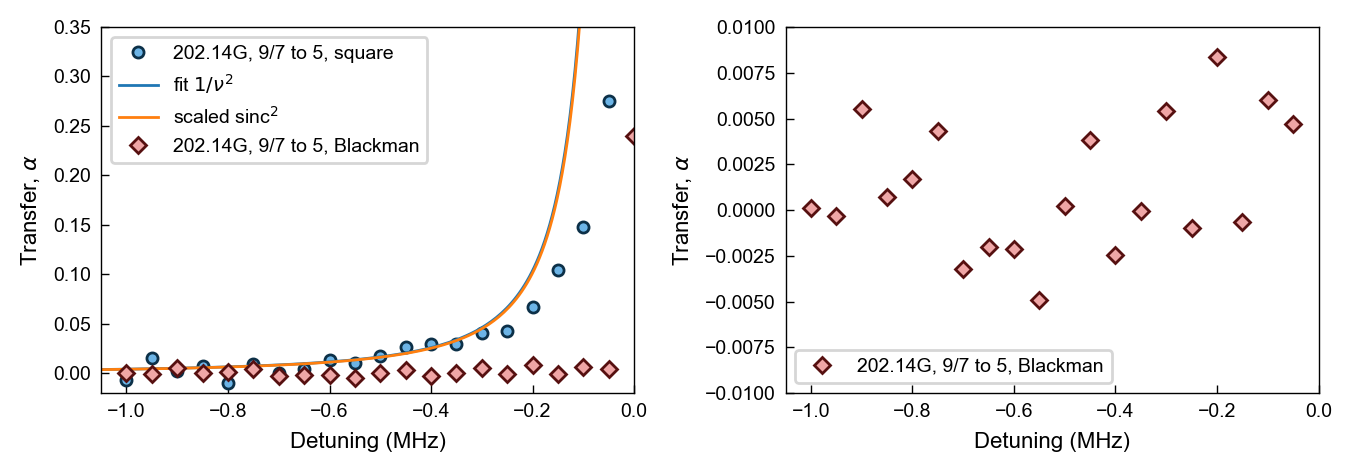

In [166]:
from general.pulses import blackman_fourier, blackman_instrument
from scipy.optimize import curve_fit

### plot settings
fig, axs = plt.subplots(1, 2, figsize=(figsize[0]*2, figsize[1]))
ax = axs[0]

nu_max, nu_min = -0.00, -1.05  # MHz
t_width = 400  # us

ax.set_xlabel(r"Detuning (MHz)")
ax.set_ylabel(r"Transfer, $\alpha$")
ax.set_xlim(nu_min, nu_max)
ax.set_ylim(-0.02, 0.35)

n = 400
nu = np.linspace(-(2*n+0.5)/t_width, -(2.5)/t_width, n)  # MHz

i = 0  # Square pulse
df = dfs[i]
sty = styles[i]
ax.plot(df['detuning'], df['transfer_corrected'], label=labels[i], **sty)

fit_func = lambda x, A: A*x**(-2)
fit_df = df[(df['detuning'] <= -0.4)]

popt, pcov = curve_fit(fit_func, fit_df['detuning'], fit_df['transfer_corrected'], p0=[1/200])
print(f"Fitted amplitude for square Fourier: {popt[0]} ± {np.sqrt(pcov[0,0])}")

ax.plot(nu, fit_func(nu, *popt), label=r'fit $1/\nu^2$')
ax.plot(nu, 80**2*np.sinc(t_width*nu)**2, label=r'scaled sinc$^2$')
# ax.plot(nu, nu**(-2)/200, label=r'$F$(Square)')

i = 3  # Blackman pulse
df = dfs[i]
sty = styles[i]
ax.plot(df['detuning'], df['transfer_corrected'], label=labels[i], **sty)
	
ax.legend()


ax = axs[1]
ax.set_xlabel(r"Detuning (MHz)")
ax.set_ylabel(r"Transfer, $\alpha$")
ax.set_xlim(nu_min, nu_max)
ax.set_ylim(-0.01, 0.01)
i = 3  # Blackman pulse
df = dfs[i]
sty = styles[i]
ax.plot(df['detuning'], df['transfer_corrected'], label=labels[i], **sty)
	
ax.legend()
fig.tight_layout()
plt.show()


In [145]:
0.0007/0.150

200
100

400
50

np.sort(df['detuning'])


array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ])

In [162]:
np.sort(dfs[0]['transfer_corrected'])
np.sort(dfs[3]['transfer_corrected'])

np.std(dfs[3][dfs[3]['detuning']<-0.01]['transfer_corrected'])

np.float64(0.0035010735301996654)

In [134]:
3/t_width

0.0075

In [164]:
sup_factor = 0.00072/0.27371811
print(f"At -50kHz with a 400us Blackman pulse, estimate a {sup_factor:.4f}({1e4*sup_factor*7.2/38.1:.0f}) suppression factor")

sup_factor = (0.004675+0.0035)/0.2749
print(f"At -50kHz with a 400us Blackman pulse, estimate a {sup_factor:.4f}({1e4*sup_factor*7.2/38.1:.0f}) suppression factor")

At -50kHz with a 400us Blackman pulse, estimate a 0.0026(5) suppression factor
At -50kHz with a 400us Blackman pulse, estimate a 0.0297(56) suppression factor


In [168]:
0.2749*(7.2/38.1
       )

0.051949606299212595

In [170]:
(0.004675)/0.2749 * np.sqrt((0.052/0.2749)**2 + (0.0035/0.004675)**2)



np.float64(0.01313201004932384)

In [ ]:
0.01700618406693343
